# Assignment 1

## Read data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Read training data
D = pd.read_csv("data/DST_BIL54.csv")

# Equivalent di str(D) in R
print(D.info())
print(D.head())

D["time"] = pd.to_datetime(D["time"].astype(str) + "-01", format="%Y-%m-%d", utc=True)

print(D["time"])
print(D["time"].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time          84 non-null     object
 1   total         84 non-null     int64 
 2   gasoline      84 non-null     int64 
 3   diesel        84 non-null     int64 
 4   fgas          84 non-null     int64 
 5   ngas          84 non-null     int64 
 6   electricity   84 non-null     int64 
 7   petroleum     84 non-null     int64 
 8   hydrogen      84 non-null     int64 
 9   methanol      84 non-null     int64 
 10  ethanol       84 non-null     int64 
 11  pluginhybrid  84 non-null     int64 
 12  otherfuels    84 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 8.7+ KB
None
      time    total  gasoline   diesel  fgas  ngas  electricity  petroleum  \
0  2018-01  2930483   1781826  1136656    12   256         9304          0   
1  2018-02  2934044   1783338  1138414    12   255     

## 1. Plot data

[2.930483 2.934044 2.941422 2.951498 2.963093 2.973721 2.976096 2.985537
 2.983209 2.982473 2.98453  2.984123 2.988432 2.991279 3.002834 3.008125
 3.016558 3.025807 3.027397 3.034273 3.03348  3.03097  3.03212  3.03209
 3.036213 3.037617 3.036205 3.040346 3.04856  3.060994 3.072466 3.081409
 3.085458 3.087414 3.091698 3.100222 3.139166 3.139557 3.154415 3.162174
 3.173165 3.185814 3.191486 3.19945  3.200838 3.198798 3.198864 3.204309
 3.202713 3.20372  3.209522 3.215399 3.21942  3.223647 3.222857 3.223624
 3.218379 3.210424 3.207359 3.209511 3.205688 3.204567 3.210827 3.216852
 3.221263 3.228278 3.227684 3.228835 3.226588 3.220559 3.22192  3.227541] [3.223801 3.223805 3.231177 3.237629 3.244611 3.255073 3.254569 3.25806
 3.256515 3.252275 3.253059 3.258025]


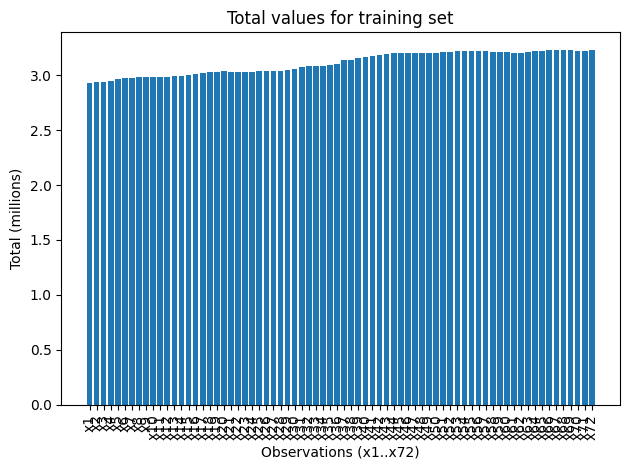

In [38]:
D["year"] = D["time"].dt.year + (D["time"].dt.month - 1) / 12.0

# Make output variable floating point and scale
D["total"] = pd.to_numeric(D["total"], errors="coerce") / 1e6

# Divide into train and test set
teststart = pd.Timestamp("2024-01-01", tz="UTC")
Dtrain = D[D["time"] < teststart].copy()
Dtest  = D[D["time"] >= teststart].copy()
X = Dtrain["year"].values

y = Dtrain["total"].to_numpy()          # heights
n = len(y)
y_test = Dtest["total"].to_numpy()

print(y, y_test)
x_labels = [f"x{i}" for i in range(1, n+1)]  # x1..xn
x_pos = np.arange(n)                         # 0..n-1 positions

plt.figure()
plt.bar(x_pos, y)

plt.xticks(x_pos, x_labels, rotation=90)  # rotate so labels fit
plt.xlabel("Observations (x1..x{})".format(n))
plt.ylabel("Total (millions)")
plt.title("Total values for training set")
plt.tight_layout()
#plt.show()
#print("Train shape:", Dtrain.shape)
##print("Test shape:", Dtest.shape)
#Dtrain.to_csv("train.csv", index=False)
#Dtest.to_csv("test.csv", index=False)

## 2. Defining X and y

In [39]:
y3 = Dtrain["total"].iloc[:3].to_numpy()
x3 = Dtrain["year"].iloc[:3].to_numpy()
x3 = np.c_[np.ones(3), x3]   # adds a column of 1s in front

print(x3.shape)  # should be [2018. , 2018.0833..., 2018.1666...]
print(y3.shape)  # your first 3 totals (in millions)

(3, 2)
(3,)


## OLS

To calculate $\hat{\theta}$ we can use the following formula:
$$ \hat{\theta} = (x^T x)^{-1} x^T Y$$

In [40]:
x3t = np.transpose(x3)
A = np.linalg.inv(x3t @ x3)
B = x3t @ y3
theta = A @ B
print(theta.shape)
print(theta)

(2,)
[-1.29519555e+02  6.56339952e-02]


2.428248746847109e-06
0.001350256995957892 9.973489161014368e-07


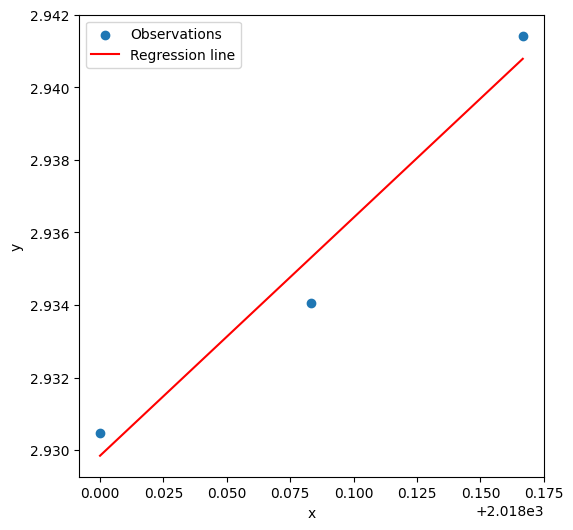

In [41]:
n = 3 #number of samples
p = 2 # number of parameters
C = y3 - x3 @ theta
sigma_sq = (np.transpose(C)@(C))/(n-p)
print(sigma_sq)

x_mean = np.mean(x3)
S_xx = (len(x3) - 1) * np.var(x3, ddof=1)

sigma1 = np.sqrt(sigma_sq*(1/n + (x_mean)**2/S_xx))
sigma2 = np.sqrt(sigma_sq/S_xx)

print(sigma1, sigma2)
x_plot = np.linspace(x3[0, 1], x3[2, 1], 100)
f = lambda x: theta[0] + x * theta[1]

plt.figure(figsize=(6,6))
plt.scatter(x3[:, 1], y3, label='Observations')
plt.plot(x_plot, f(x_plot), label='Regression line', color ='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();


In [42]:
x_test = Dtest["year"].values
y_pred = theta[0] + theta[1] * x_test

df = pd.DataFrame({"x_t": x_test, "y_t": y_pred})
print(df)

            x_t       y_t
0   2024.000000  3.323651
1   2024.083333  3.329121
2   2024.166667  3.334590
3   2024.250000  3.340060
4   2024.333333  3.345529
5   2024.416667  3.350999
6   2024.500000  3.356468
7   2024.583333  3.361938
8   2024.666667  3.367407
9   2024.750000  3.372877
10  2024.833333  3.378346
11  2024.916667  3.383816


In [46]:
def prediction_interval_ols(x_train, theta, sigma_sq, x_new, alpha=0.05):
    """
    1D OLS with intercept: y = theta[0] + theta[1]*x
    Returns: yhat, lower, upper for x_new (scalar or array)
    """
    x_train = np.asarray(x_train, dtype=float)
    x_new   = np.asarray(x_new, dtype=float)

    n = len(x_train)
    xbar = x_train.mean()
    Sxx  = np.sum((x_train - xbar)**2)

    sigma = np.sqrt(sigma_sq)
    tcrit = t.ppf(1 - alpha/2, df=n-2)

    yhat = theta[0] + theta[1]*x_new

    # prediction SE (note the +1 term!)
    se_pred = sigma * np.sqrt(1 + 1/n + (x_new - xbar)**2 / Sxx)

    lower = yhat - tcrit * se_pred
    upper = yhat + tcrit * se_pred
    return yhat, lower, upper

pred_int = prediction_interval_ols(x3[:, 1], theta, sigma_sq, x_test)

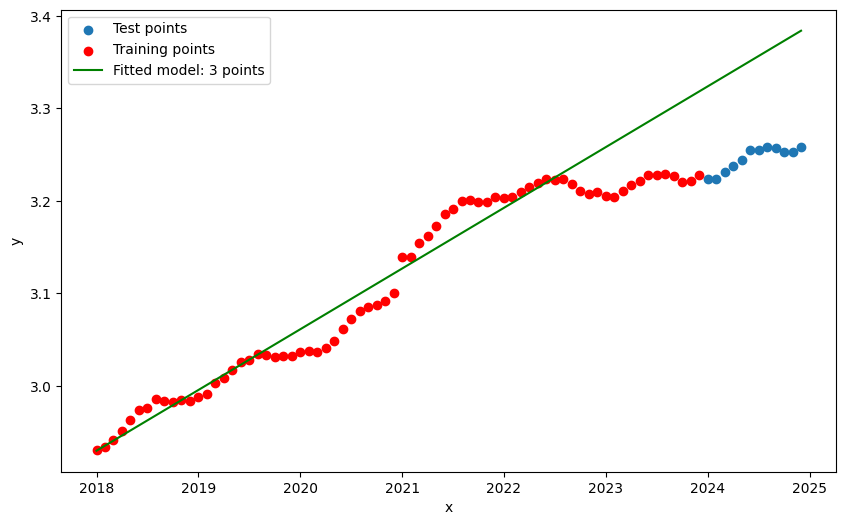

In [ ]:
x_plot = np.linspace(X[0], x_test[-1], 200)
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, label='Test points')
plt.scatter(X, y, label='Training points', color='r')
plt.plot(x_plot, f(x_plot), label='Fitted model: 3 points', color='green')
plt.plot(x_test,)
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

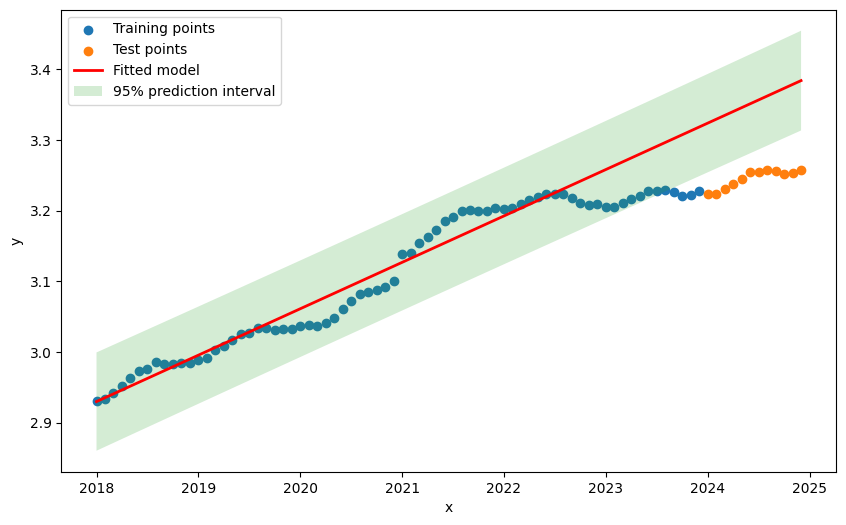

In [48]:
X = np.asarray(X, dtype=float)
y = np.asarray(y, dtype=float)
x_test  = np.asarray(x_test,  dtype=float)
y_test  = np.asarray(y_test,  dtype=float)
theta   = np.asarray(theta,   dtype=float)

# fitted function
f = lambda x: theta[0] + theta[1]*x

# ---- estimate sigma^2 from training residuals ----
n = len(X)
yhat_train = f(X)
resid = y - yhat_train
sigma_sq = np.sum(resid**2) / (n - 2)
sigma = np.sqrt(sigma_sq)

# ---- pieces for PI ----
xbar = X.mean()
Sxx  = np.sum((X - xbar)**2)
tcrit = t.ppf(0.975, df=n-2)  # 95% PI

# x grid for smooth line + band
x_plot = np.linspace(min(X.min(), x_test.min()),
                     max(X.max(), x_test.max()),
                     200)

yhat_plot = f(x_plot)
se_pred_plot = sigma * np.sqrt(1 + 1/n + (x_plot - xbar)**2 / Sxx)  # PI (note +1)
lo_plot = yhat_plot - tcrit * se_pred_plot
hi_plot = yhat_plot + tcrit * se_pred_plot

# ---- plot ----
plt.figure(figsize=(10,6))

plt.scatter(X, y, label='Training points', )
plt.scatter(x_test, y_test, label='Test points')

plt.plot(x_plot, yhat_plot, label='Fitted model', linewidth=2, color='r')
plt.fill_between(x_plot, lo_plot, hi_plot, alpha=0.2, label='95% prediction interval')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
